In [79]:
# Add Jupyter widgets

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator as o
from datetime import datetime,time
import xml.etree.ElementTree as ET
import json
import ipywidgets as widgets
%matplotlib inline 

Widget demo

In [105]:
et = widgets.Dropdown(
    options=['start', 'complete', 'start+complete'],
    value='complete',
    description='Event Type:',
    disabled=False,
)
display(et)

Dropdown(description='Event Type:', index=1, options=('start', 'complete', 'start+complete'), value='complete'…

In [108]:
et.value

'complete'

End of demo

In [80]:
dateCols = ['Timestamp']
df = pd.read_csv("log.csv", parse_dates=dateCols)
df = df[df.EventType != 'assign']
df['Day'] = df['Timestamp'].dt.weekday_name
df['Hour'] = df['Timestamp'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4402 entries, 1 to 6602
Data columns (total 7 columns):
CaseID       4402 non-null int64
Activity     4402 non-null object
EventType    4402 non-null object
Resource     4402 non-null object
Timestamp    4402 non-null datetime64[ns]
Day          4402 non-null object
Hour         4402 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 275.1+ KB


In [119]:
roles = df['Resource'].unique()
roles

array(['Role #1', 'Role #3', 'Role #4', 'Role #2'], dtype=object)

In [129]:
starting_time = df['Timestamp'].min()
documentation = {
  "startAt": starting_time.strftime("%Y-%m-%d %H:%M:%S"),
  "timetable" : {
      #Role:{
          # "Mon-Fri": "09:00:00-17:00:00"
      #}
  }
}
# finished_json = json.dumps(documentation)

In [130]:
for role in roles:
    documentation['timetable'][role] = {}
documentation

{'startAt': '2020-01-21 03:34:36',
 'timetable': {'Role #1': {}, 'Role #3': {}, 'Role #4': {}, 'Role #2': {}}}

In [134]:
df.groupby(["EventType","Resource","Day"]).count()

CaseID  Activity  Timestamp  Hour
EventType Resource Day                                         
complete  Role #1  Monday        207       207        207   207
                   Thursday      201       201        201   201
                   Tuesday       199       199        199   199
                   Wednesday     193       193        193   193
          Role #2  Monday        123       123        123   123
                   Thursday      174       174        174   174
                   Tuesday       186       186        186   186
                   Wednesday     120       120        120   120
          Role #3  Thursday       72        72         72    72
                   Wednesday     326       326        326   326
          Role #4  Friday         99        99         99    99
                   Thursday       98        98         98    98
                   Tuesday       103       103        103   103
                   Wednesday     100       100        100   100
start     Role #1  Monday        207       207        207   207
                   Thursday      202       202        202   202
                   Tuesday       197       197        197   197
                   Wednesday     194       194        194   194
          Role #2  Monday        123       123        123   123
                   Thursday      174       174        174   174
                   Tuesday       186       186        186   186
                   Wednesday     120       120        120   120
          Role #3  Monday         37        37         37    37
                   Thursday       72        72         72    72
                   Wednesday     289       289        289   289
          Role #4  Friday        100       100        100   100
                   Thursday       97        97         97    97
                   Tuesday       101       101        101   101
                   Wednesday     102       102        102   102

In [132]:
print(df.groupby(["EventType","Resource"])['Day'])

In [171]:
print(df.groupby(['Resource','Day']).min()['Hour'])
min_list = np.array(df.groupby(['EventType','Resource','Day']).min()['Hour'].to_list())
print(min_list)
print(df.groupby(['Resource','Day']).max()['Hour'])
max_list = np.array(df.groupby(['EventType','Resource','Day']).max()['Hour'].to_list())
print(max_list)

Resource  Day      
Role #1   Monday       2
          Thursday     2
          Tuesday      2
          Wednesday    2
Role #2   Monday       3
          Thursday     2
          Tuesday      2
          Wednesday    2
Role #3   Monday       3
          Thursday     2
          Wednesday    3
Role #4   Friday       4
          Thursday     4
          Tuesday      5
          Wednesday    4
Name: Hour, dtype: int64
[2 2 2 2 4 3 3 3 3 3 4 4 5 4 2 2 2 2 3 2 2 2 3 2 3 4 4 5 4]
Resource  Day      
Role #1   Monday       4
          Thursday     4
          Tuesday      4
          Wednesday    4
Role #2   Monday       6
          Thursday     6
          Tuesday      6
          Wednesday    5
Role #3   Monday       4
          Thursday     5
          Wednesday    6
Role #4   Friday       8
          Thursday     8
          Tuesday      8
          Wednesday    8
Name: Hour, dtype: int64
[4 4 4 4 6 6 6 5 5 6 8 8 8 8 4 4 4 4 5 6 6 5 4 5 6 8 8 8 8]


In [77]:
# use all but assing and get ranges !

In [204]:
# values must be sent in order: hour, minute?, second?
def int_to_hour(values,typeofvalues):
    if len(values) == len(typeofvalues):
        if 'hour' in typeofvalues:
            if 'minute'in typeofvalues:
                if 'second' in typeofvalues:
                    hour = datetime.time(values[0],values[1],values[2])
                else:
                    hour = datetime.time(values[0],values[1],0)
            else:
                hour = datetime.time(values[0],0,0)
    return 

In [205]:
for hour in min_list:
    r = int_to_hour([hour.item()],['hour'])
    print('res',r)

TypeError: descriptor 'time' requires a 'datetime.datetime' object but received a 'int'

In [7]:
df.groupby(["EventType","Resource","Day","Hour"]).count()['CaseID']

EventType  Resource  Day        Hour
complete   Role #1   Monday     2        56
                                3       104
                                4        47
                     Thursday   2        62
                                3       102
                                4        37
                     Tuesday    2        58
                                3       102
                                4        39
                     Wednesday  2        60
                                3        98
                                4        35
           Role #2   Monday     4        76
                                5        46
                                6         1
                     Thursday   3        18
                                4        69
                                5        66
                                6        21
                     Tuesday    3        19
                                4        89
                                5      

In [8]:
df.sort_values(by=['Timestamp']).head(10)

,CaseID,Activity,EventType,Resource,Timestamp,Day,Hour
4232,49,Activity 1,complete,Role #1,2020-01-21 03:50:32.609,Tuesday,3
2927,51,Activity 1,complete,Role #1,2020-01-22 02:09:36.171,Wednesday,2
2879,50,Activity 1,complete,Role #1,2020-01-22 02:16:53.430,Wednesday,2
3869,52,Activity 1,complete,Role #1,2020-01-22 02:23:57.182,Wednesday,2
3884,54,Activity 1,complete,Role #1,2020-01-22 02:40:04.453,Wednesday,2
3851,53,Activity 1,complete,Role #1,2020-01-22 02:41:34.368,Wednesday,2
3719,56,Activity 1,complete,Role #1,2020-01-22 02:54:55.508,Wednesday,2
3785,55,Activity 1,complete,Role #1,2020-01-22 03:01:38.368,Wednesday,3
3128,58,Activity 1,complete,Role #1,2020-01-22 03:24:48.210,Wednesday,3
3686,57,Activity 1,complete,Role #1,2020-01-22 03:27:41.956,Wednesday,3


In [9]:
df.sort_values(by=['Timestamp']).tail(10)

,CaseID,Activity,EventType,Resource,Timestamp,Day,Hour
338,419,Activity 8,complete,Role #4,2020-06-04 07:48:01.147,Thursday,7
1823,429,Activity 8,complete,Role #4,2020-06-04 08:37:49.243,Thursday,8
509,435,Activity 8,complete,Role #4,2020-06-05 05:17:48.047,Friday,5
986,443,Activity 8,complete,Role #4,2020-06-05 05:32:13.975,Friday,5
5699,438,Activity 8,complete,Role #4,2020-06-05 05:52:36.958,Friday,5
6161,434,Activity 8,complete,Role #4,2020-06-05 06:09:35.564,Friday,6
6047,427,Activity 8,complete,Role #4,2020-06-05 07:03:53.473,Friday,7
1373,439,Activity 8,complete,Role #4,2020-06-05 07:40:36.174,Friday,7
845,446,Activity 8,complete,Role #4,2020-06-09 05:11:58.416,Tuesday,5
5264,445,Activity 8,complete,Role #4,2020-06-09 05:20:47.559,Tuesday,5


In [10]:
days_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
roles_list = ['Role #1','Role #2','Role #3', 'Role #4']
hour_list = range(24)

In [25]:
# cartesian product
dict_keys = [(role,day,hour) for role in roles_list for day in days_list for hour in hour_list]
new_range = [0] * len(dict_keys)
day_counter_map = dict(zip(dict_keys, new_range))
day_counter_map

{('Role #1', 'Monday', 0): 0,
 ('Role #1', 'Monday', 1): 0,
 ('Role #1', 'Monday', 2): 0,
 ('Role #1', 'Monday', 3): 0,
 ('Role #1', 'Monday', 4): 0,
 ('Role #1', 'Monday', 5): 0,
 ('Role #1', 'Monday', 6): 0,
 ('Role #1', 'Monday', 7): 0,
 ('Role #1', 'Monday', 8): 0,
 ('Role #1', 'Monday', 9): 0,
 ('Role #1', 'Monday', 10): 0,
 ('Role #1', 'Monday', 11): 0,
 ('Role #1', 'Monday', 12): 0,
 ('Role #1', 'Monday', 13): 0,
 ('Role #1', 'Monday', 14): 0,
 ('Role #1', 'Monday', 15): 0,
 ('Role #1', 'Monday', 16): 0,
 ('Role #1', 'Monday', 17): 0,
 ('Role #1', 'Monday', 18): 0,
 ('Role #1', 'Monday', 19): 0,
 ('Role #1', 'Monday', 20): 0,
 ('Role #1', 'Monday', 21): 0,
 ('Role #1', 'Monday', 22): 0,
 ('Role #1', 'Monday', 23): 0,
 ('Role #1', 'Tuesday', 0): 0,
 ('Role #1', 'Tuesday', 1): 0,
 ('Role #1', 'Tuesday', 2): 0,
 ('Role #1', 'Tuesday', 3): 0,
 ('Role #1', 'Tuesday', 4): 0,
 ('Role #1', 'Tuesday', 5): 0,
 ('Role #1', 'Tuesday', 6): 0,
 ('Role #1', 'Tuesday', 7): 0,
 ('Role #1', 'Tues

In [26]:
for index, row in df.iterrows():
    role = row['Resource']
    day = row['Timestamp'].strftime("%A")
    hour = row['Timestamp'].hour
    tup = (role,day,hour)
    day_counter_map[tup] += 1  

In [27]:
day_counter_map
backup_map = day_counter_map
backup_map

{('Role #1', 'Monday', 0): 0,
 ('Role #1', 'Monday', 1): 0,
 ('Role #1', 'Monday', 2): 56,
 ('Role #1', 'Monday', 3): 104,
 ('Role #1', 'Monday', 4): 47,
 ('Role #1', 'Monday', 5): 0,
 ('Role #1', 'Monday', 6): 0,
 ('Role #1', 'Monday', 7): 0,
 ('Role #1', 'Monday', 8): 0,
 ('Role #1', 'Monday', 9): 0,
 ('Role #1', 'Monday', 10): 0,
 ('Role #1', 'Monday', 11): 0,
 ('Role #1', 'Monday', 12): 0,
 ('Role #1', 'Monday', 13): 0,
 ('Role #1', 'Monday', 14): 0,
 ('Role #1', 'Monday', 15): 0,
 ('Role #1', 'Monday', 16): 0,
 ('Role #1', 'Monday', 17): 0,
 ('Role #1', 'Monday', 18): 0,
 ('Role #1', 'Monday', 19): 0,
 ('Role #1', 'Monday', 20): 0,
 ('Role #1', 'Monday', 21): 0,
 ('Role #1', 'Monday', 22): 0,
 ('Role #1', 'Monday', 23): 0,
 ('Role #1', 'Tuesday', 0): 0,
 ('Role #1', 'Tuesday', 1): 0,
 ('Role #1', 'Tuesday', 2): 58,
 ('Role #1', 'Tuesday', 3): 102,
 ('Role #1', 'Tuesday', 4): 39,
 ('Role #1', 'Tuesday', 5): 0,
 ('Role #1', 'Tuesday', 6): 0,
 ('Role #1', 'Tuesday', 7): 0,
 ('Role #1

In [14]:
max_value = max(day_counter_map.values())
# min_threshold represents the labour of 7.5% on the max day, any less, should be considered an anomaly
min_threshold = int(max_value * .075)
min_threshold

12

In [15]:
non_working_days = []
for role_day, quantity in day_counter_map.items():
    if quantity <= min_threshold:
        non_working_days.append(role_day)
for day in non_working_days:
    day_counter_map.pop(day, None)
day_counter_map

{('Role #1', 'Monday', 2): 56,
 ('Role #1', 'Monday', 3): 104,
 ('Role #1', 'Monday', 4): 47,
 ('Role #1', 'Tuesday', 2): 58,
 ('Role #1', 'Tuesday', 3): 102,
 ('Role #1', 'Tuesday', 4): 39,
 ('Role #1', 'Wednesday', 2): 60,
 ('Role #1', 'Wednesday', 3): 98,
 ('Role #1', 'Wednesday', 4): 35,
 ('Role #1', 'Thursday', 2): 62,
 ('Role #1', 'Thursday', 3): 102,
 ('Role #1', 'Thursday', 4): 37,
 ('Role #2', 'Monday', 4): 76,
 ('Role #2', 'Monday', 5): 46,
 ('Role #2', 'Tuesday', 3): 19,
 ('Role #2', 'Tuesday', 4): 89,
 ('Role #2', 'Tuesday', 5): 68,
 ('Role #2', 'Wednesday', 3): 17,
 ('Role #2', 'Wednesday', 4): 69,
 ('Role #2', 'Wednesday', 5): 34,
 ('Role #2', 'Thursday', 3): 18,
 ('Role #2', 'Thursday', 4): 69,
 ('Role #2', 'Thursday', 5): 66,
 ('Role #2', 'Thursday', 6): 21,
 ('Role #3', 'Wednesday', 3): 29,
 ('Role #3', 'Wednesday', 4): 165,
 ('Role #3', 'Wednesday', 5): 89,
 ('Role #3', 'Wednesday', 6): 43,
 ('Role #3', 'Thursday', 4): 49,
 ('Role #3', 'Thursday', 5): 13,
 ('Role #4',

In [16]:
days_worked = list(day_counter_map.values())
tuples = list(day_counter_map.keys())
roles = []
day_of_week = []
hours = []
for tup in tuples:
    role, day, hour = tup
    roles.append(role)
    day_of_week.append(day)
    hours.append(hour)
day_of_week

['Monday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Friday',
 'Friday']

In [17]:
data = {'Resource':roles, 'Weekday':day_of_week, 'Count':days_worked}
new_df = pd.DataFrame(data)
new_df

,Resource,Weekday,Count
0,Role #1,Monday,56
1,Role #1,Monday,104
2,Role #1,Monday,47
3,Role #1,Tuesday,58
4,Role #1,Tuesday,102
5,Role #1,Tuesday,39
6,Role #1,Wednesday,60
7,Role #1,Wednesday,98
8,Role #1,Wednesday,35
9,Role #1,Thursday,62


Text(0, 0.5, 'Amount of days')

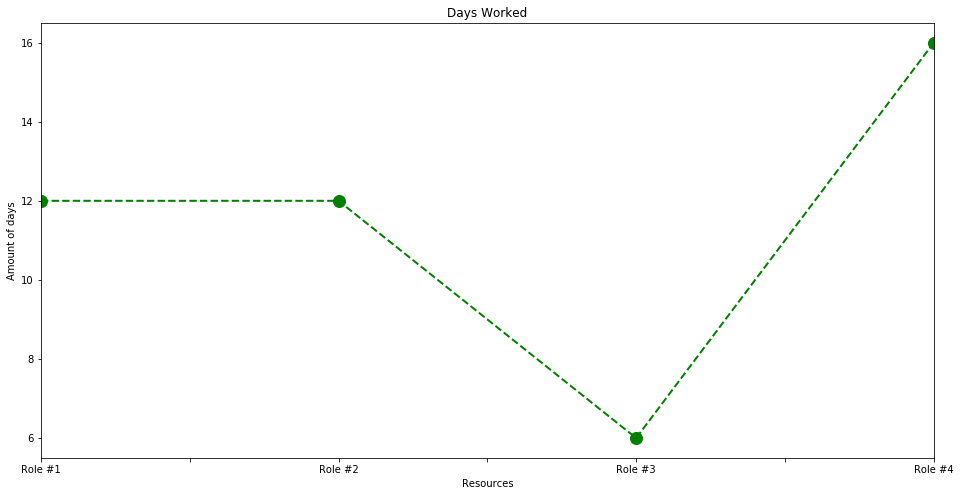

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
new_df.groupby(['Resource']).count()['Weekday'].plot(ax=ax,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('Days Worked')
plt.xlabel('Resources')
plt.ylabel('Amount of days')

Text(0, 0.5, 'Amount of days')

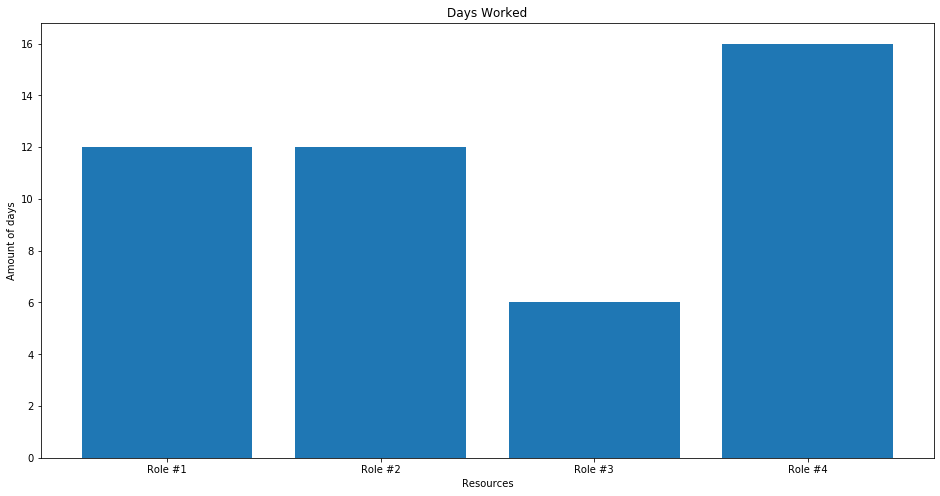

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
x_axis = ['Role #1','Role #2','Role #3','Role #4']
y_axis = new_df.groupby(['Resource']).count()['Weekday']
plt.bar(x_axis, y_axis)
plt.title('Days Worked')
plt.xlabel('Resources')
plt.ylabel('Amount of days')

In [20]:
# pending to automize

In [28]:
dpoints = []
for tup, value in backup_map.items(): 
    role,day,hour = tup
    dpoints.append([role,day,hour,value])
dpoints = np.array(dpoints)
dpoints

array([['Role #1', 'Monday', '0', '0'],
       ['Role #1', 'Monday', '1', '0'],
       ['Role #1', 'Monday', '2', '56'],
       ...,
       ['Role #4', 'Sunday', '21', '0'],
       ['Role #4', 'Sunday', '22', '0'],
       ['Role #4', 'Sunday', '23', '0']], dtype='<U9')

In [29]:
def barplot(ax, dpoints):
    # Aggregate the conditions and the categories according to their mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    # sort the conditions, categories and data so that the bars in the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=cond, color=cm.Accent(float(i) / n))
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=90)
    ax.set_ylabel("Quantity of Work")
    ax.set_xlabel("Days")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

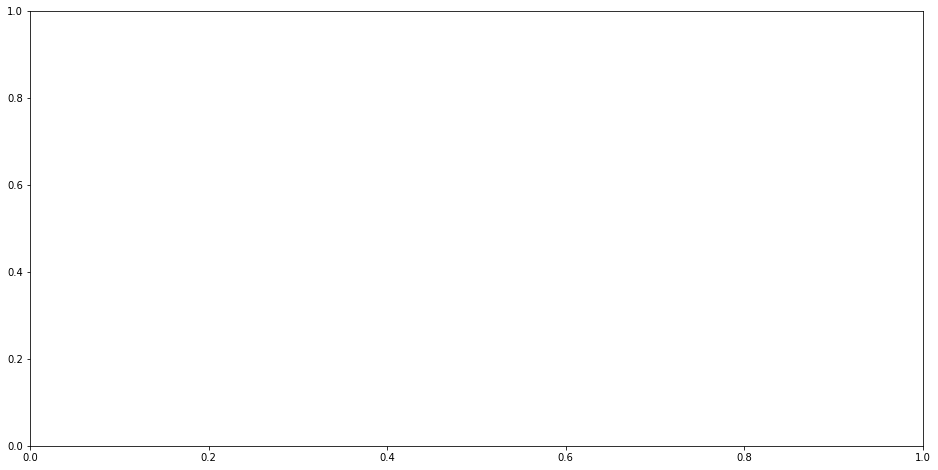

In [30]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
barplot(ax, dpoints)
fig.savefig("workdays.png")
plt.show()